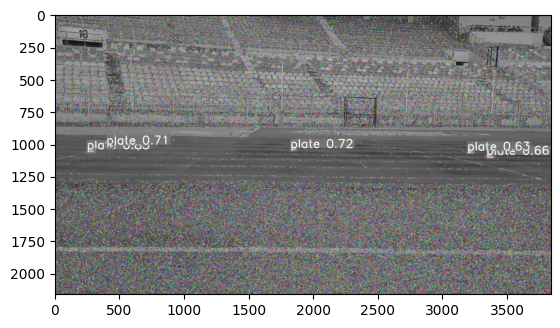

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
img = cv.imread('./image.png' )
crop_img = img[200:, 200:]
gray= cv.cvtColor(img, cv. COLOR_BGR2GRAY)
sift = cv. SIFT_create()
#kp = sift.detect(gray,None)
kp, des = sift. detectAndCompute(gray, None)
img=cv.drawKeypoints(gray,kp,img)           
cv.imwrite('sift_keypoints.jpg',img)
plt.imshow(img)
plt.show()


In [2]:
des.shape

(165684, 128)

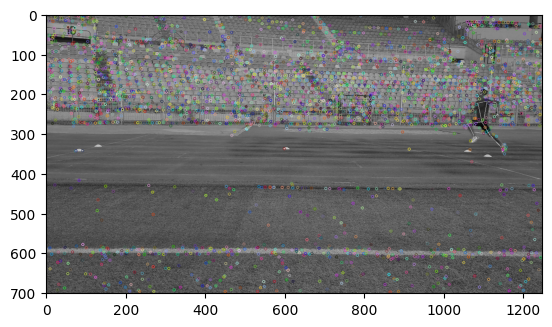

In [3]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
img = cv.imread('./Screenshot2024-06-10--084327.png' )
crop_img = img[200:, 200:]
gray= cv.cvtColor(img, cv. COLOR_BGR2GRAY)
sift = cv. SIFT_create()
#kp = sift.detect(gray,None)
kp, des = sift. detectAndCompute(gray, None)
img=cv.drawKeypoints(gray,kp,img)           
cv.imwrite('sift_keypoints.jpg',img)
plt.imshow(img)
plt.show()

In [4]:
des.shape

(3678, 128)

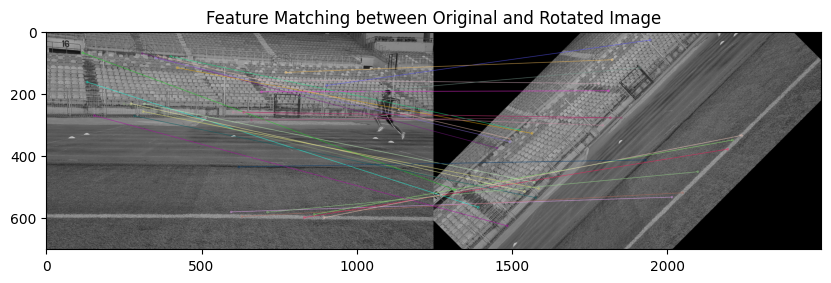

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# Load the image
img = cv.imread('./Screenshot2024-06-10--084327.png')

# Check if the image was loaded successfully
if img is None:
    print("Error: Image not found or could not be loaded.")
else:
    # Crop the image starting from (200, 200)
    crop_img = img[200:, 200:]
    
    # Convert the image to grayscale
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    # Initialize SIFT detector
    sift = cv.SIFT_create()

    # Detect keypoints and descriptors for the original image
    kp1, des1 = sift.detectAndCompute(gray, None)

    # Rotate the image by 45 degrees
    (h, w) = gray.shape[:2]
    center = (w // 2, h // 2)
    M = cv.getRotationMatrix2D(center, 45, 1.0)
    rotated_img = cv.warpAffine(gray, M, (w, h))

    # Detect keypoints and descriptors for the rotated image
    kp2, des2 = sift.detectAndCompute(rotated_img, None)

    # Use BFMatcher to find the best matches between descriptors
    bf = cv.BFMatcher(cv.NORM_L2, crossCheck=True)
    matches = bf.match(des1, des2)

    # Sort matches by distance (best matches first)
    matches = sorted(matches, key=lambda x: x.distance)

    # Draw the matches
    match_img = cv.drawMatches(gray, kp1, rotated_img, kp2, matches[:30], None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    # Display the matching result
    plt.figure(figsize=(10, 5))
    plt.imshow(match_img, cmap='gray')
    plt.title("Feature Matching between Original and Rotated Image")
    plt.show()

    # Save the result to a file
    cv.imwrite('sift_keypoints_matches.jpg', match_img)